<a href="https://colab.research.google.com/github/riyasr21/Project/blob/master/SVM_CRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install scikit-learn
! pip install nltk

In [2]:
! git clone https://github.com/riyasr21/Project.git


Cloning into 'Project'...
remote: Enumerating objects: 4514, done.
remote: Counting objects: 100% (4514/4514), done.
remote: Compressing objects: 100% (4441/4441), done.
remote: Total 4514 (delta 64), reused 4514 (delta 64), pack-reused 0
Receiving objects: 100% (4514/4514), 34.26 MiB | 22.98 MiB/s, done.
Resolving deltas: 100% (64/64), done.
Updating files: 100% (7715/7715), done.


In [16]:
import nltk
import numpy as np
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.tag import CRFTagger
import string
import pickle

NLTK data for CRF

In [4]:
nltk.download('conll2002')

[nltk_data] Downloading package conll2002 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2002.zip.


True

In [5]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    sentences, labels = [], []
    current_sentence, current_labels = [], []

    for line in lines:
        if any(char in set(string.punctuation) - {'-'} for char in line):
          continue
        if line == '\n':
            sentences.append(current_sentence)
            labels.append(current_labels)
            current_sentence, current_labels = [], []
        else:
            word,_,_,_,_,label = line.strip().split()
            current_sentence.append(word.lower())
            current_labels.append(label)

    return sentences, labels

train_file_path = '/content/Project/fbner/train.txt'
sentences, labels = load_data(train_file_path)

In [6]:
sentences

[['age', '≥', 'of', 'age'],
 ['eligible',
  'to',
  'undergo',
  'excisional',
  'surgery',
  'such',
  'as',
  'pleurectomy',
  'decortication',
  'p',
  'dc',
  'or',
  'any',
  'other',
  'mesothelioma',
  'surgery'],
 ['histologically',
  'confirmed',
  'malignant',
  'pleural',
  'mesothelioma',
  'that',
  'is',
  'not',
  'metastatic',
  'or',
  'unresectable'],
 ['history',
  'of',
  'or',
  'perforation',
  'within',
  'to',
  'the',
  'first',
  'dose',
  'of',
  'study',
  'drug'],
 ['known', 'history', 'of', 'or', 'any', 'current', 'of', 'any', 'cause'],
 ['known', 'history', 'of'],
 ['known',
  'history',
  'of',
  'or',
  'within',
  'to',
  'the',
  'first',
  'dose',
  'of',
  'study',
  'drug'],
 ['localized',
  'disease',
  'the',
  'malignancy',
  'is',
  'confined',
  'to',
  'one',
  'affected',
  'hemithorax',
  'mediastinal',
  'n2',
  'lymph',
  'nodes',
  'via',
  'cervical',
  'mediastinoscopy',
  'or',
  'ebus',
  'endobronchial',
  'ultrasound',
  'must',
  

In [7]:
len(sentences)

40237

In [8]:
len(labels)

40237

In [9]:
labels

[['B-age', 'O', 'O', 'B-age'],
 ['O',
  'O',
  'O',
  'B-treatment',
  'I-treatment',
  'O',
  'O',
  'B-treatment',
  'I-treatment',
  'I-treatment',
  'I-treatment',
  'O',
  'O',
  'O',
  'B-treatment',
  'I-treatment'],
 ['O', 'O', 'O', 'B-cancer', 'I-cancer', 'O', 'O', 'O', 'B-cancer', 'O', 'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-treatment',
  'I-treatment'],
 ['O',
  'O',
  'O',
  'B-cancer',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-treatment',
  'I-treatment',
  'O',
  'B-treatment',
  'I-treatment',
  'I-treatment',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['B-gender'],
 ['O',
  'O',
  'O',
  'O',
  'B-treatment',
  'O',
  'B-treatment',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-cancer',
  'O',
  'O',

In [10]:
X_combined = np.array([word for sentence in sentences for word in sentence])
print(len(X_combined))
y_combined = np.array([item for sublist in labels for item in sublist])
# len(y_combined)

398787


In [38]:
y_combined

array(['B-age', 'O', 'O', ..., 'B-treatment', 'O', 'O'], dtype='<U11')

In [11]:
labels

[['B-age', 'O', 'O', 'B-age'],
 ['O',
  'O',
  'O',
  'B-treatment',
  'I-treatment',
  'O',
  'O',
  'B-treatment',
  'I-treatment',
  'I-treatment',
  'I-treatment',
  'O',
  'O',
  'O',
  'B-treatment',
  'I-treatment'],
 ['O', 'O', 'O', 'B-cancer', 'I-cancer', 'O', 'O', 'O', 'B-cancer', 'O', 'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-treatment',
  'I-treatment'],
 ['O',
  'O',
  'O',
  'B-cancer',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-treatment',
  'I-treatment',
  'O',
  'B-treatment',
  'I-treatment',
  'I-treatment',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['B-gender'],
 ['O',
  'O',
  'O',
  'O',
  'B-treatment',
  'O',
  'B-treatment',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-cancer',
  'O',
  'O',

In [12]:
import re

In [13]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_combined)
y = np.array([1 if re.match(r'[BI]-', label) else 0 for label in y_combined])

In [14]:
sum(y)

78538

In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X, y)

SVC(kernel='linear')

In [ ]:

# save the classifier
with open('svm_classifier.pkl', 'wb') as fid:
    pickle.dump(svm_classifier, fid)

In [17]:
# Loading the classifier
with open('/content/drive/MyDrive/svm_classifier.pkl', 'rb') as fid:
    svm_loaded = pickle.load(fid)

In [29]:
def word2features(doc, i):
  word = doc[i][0]
  postag = doc[i][1]

  # Common features for all words
  features = [
      'bias',
      'word.lower=' + word.lower(),
      'word[-3:]=' + word[-3:],
      'word[-2:]=' + word[-2:],
      'word.isupper=%s' % word.isupper(),
      'word.istitle=%s' % word.istitle(),
      'word.isdigit=%s' % word.isdigit(),
      'postag=' + postag
  ]

  # Features for words that are not
  # at the beginning of a document
  if i > 0:
      word1 = doc[i-1][0]
      postag1 = doc[i-1][1]
      features.extend([
          '-1:word.lower=' + word1.lower(),
          '-1:word.istitle=%s' % word1.istitle(),
          '-1:word.isupper=%s' % word1.isupper(),
          '-1:word.isdigit=%s' % word1.isdigit(),
          '-1:postag=' + postag1
      ])
  else:
      # Indicate that it is the 'beginning of a document'
      features.append('BOS')

  # Features for words that are not
  # at the end of a document
  if i < len(doc)-1:
      word1 = doc[i+1][0]
      postag1 = doc[i+1][1]
      features.extend([
          '+1:word.lower=' + word1.lower(),
          '+1:word.istitle=%s' % word1.istitle(),
          '+1:word.isupper=%s' % word1.isupper(),
          '+1:word.isdigit=%s' % word1.isdigit(),
          '+1:postag=' + postag1
      ])
  else:
      # Indicate that it is the 'end of a document'
      features.append('EOS')

  return features

In [19]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [40]:
def create_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = []
    current_data = []

    for line in lines:
        if any(char in set(string.punctuation) - {'-'} for char in line):
          continue
        if line == '\n':
            data.append(current_data)
            current_data = []
        else:
            word,_,_,_,_,label = line.strip().split()
            current_data.append((word.lower(), label))

    return data

train_file_path = '/content/Project/fbner/train.txt'
test_file_path = '/content/Project/fbner/test.txt'
data_train = create_data(train_file_path)
data_test = create_data(test_file_path)

In [41]:
data_train[0]

[('age', 'B-age'), ('≥', 'O'), ('of', 'O'), ('age', 'B-age')]

In [42]:
import nltk
data_train_pos = []
for i, doc in enumerate(data_train):

    # Obtain the list of tokens in the document
    tokens = [t for t, label in doc]

    # Perform POS tagging
    tagged = nltk.pos_tag(tokens)

    # Take the word, POS tag, and its label
    data_train_pos.append([(w, pos, label) for (w, label), (word, pos) in zip(doc, tagged)])


data_train_pos

[[('age', 'NN', 'B-age'),
  ('≥', 'NN', 'O'),
  ('of', 'IN', 'O'),
  ('age', 'NN', 'B-age')],
 [('eligible', 'JJ', 'O'),
  ('to', 'TO', 'O'),
  ('undergo', 'VB', 'O'),
  ('excisional', 'JJ', 'B-treatment'),
  ('surgery', 'NN', 'I-treatment'),
  ('such', 'JJ', 'O'),
  ('as', 'IN', 'O'),
  ('pleurectomy', 'JJ', 'B-treatment'),
  ('decortication', 'NN', 'I-treatment'),
  ('p', 'NN', 'I-treatment'),
  ('dc', 'NN', 'I-treatment'),
  ('or', 'CC', 'O'),
  ('any', 'DT', 'O'),
  ('other', 'JJ', 'O'),
  ('mesothelioma', 'NN', 'B-treatment'),
  ('surgery', 'NN', 'I-treatment')],
 [('histologically', 'RB', 'O'),
  ('confirmed', 'VBN', 'O'),
  ('malignant', 'JJ', 'O'),
  ('pleural', 'JJ', 'B-cancer'),
  ('mesothelioma', 'NN', 'I-cancer'),
  ('that', 'WDT', 'O'),
  ('is', 'VBZ', 'O'),
  ('not', 'RB', 'O'),
  ('metastatic', 'JJ', 'B-cancer'),
  ('or', 'CC', 'O'),
  ('unresectable', 'JJ', 'O')],
 [('history', 'NN', 'O'),
  ('of', 'IN', 'O'),
  ('or', 'CC', 'O'),
  ('perforation', 'NN', 'O'),
  ('withi

In [43]:

data_test_pos = []
for i, doc in enumerate(data_test):

    # Obtain the list of tokens in the document
    tokens = [t for t, label in doc]

    # Perform POS tagging
    tagged = nltk.pos_tag(tokens)

    # Take the word, POS tag, and its label
    data_test_pos.append([(w, pos, label) for (w, label), (word, pos) in zip(doc, tagged)])


data_test_pos

[[('age', 'NN', 'B-age'), ('to', 'TO', 'O')],
 [('males', 'NNS', 'B-gender')],
 [('since', 'IN', 'O'), ('childhood', 'NN', 'O')],
 [('survivor', 'NN', 'O'),
  ('who', 'WP', 'O'),
  ('is', 'VBZ', 'O'),
  ('at', 'IN', 'O'),
  ('least', 'JJS', 'O')],
 [('females', 'NNS', 'B-gender')],
 [('history', 'NN', 'O'),
  ('of', 'IN', 'O'),
  ('prior', 'JJ', 'O'),
  ('to', 'TO', 'O')],
 [('other', 'JJ', 'O'), ('than', 'IN', 'O')],
 [],
 [('ambulatory', 'NN', 'O'),
  ('or', 'CC', 'O'),
  ('able', 'JJ', 'O'),
  ('to', 'TO', 'O'),
  ('engage', 'VB', 'O'),
  ('in', 'IN', 'O'),
  ('walking', 'VBG', 'O'),
  ('for', 'IN', 'O'),
  ('at', 'IN', 'O'),
  ('least', 'JJS', 'O')],
 [('concurrent', 'JJ', 'O'),
  ('diagnosis', 'NN', 'O'),
  ('of', 'IN', 'O'),
  ('or', 'CC', 'O'),
  ('significant', 'JJ', 'O')],
 [('currently', 'RB', 'O'),
  ('engaged', 'VBN', 'O'),
  ('in', 'IN', 'O'),
  ('structured', 'JJ', 'O'),
  ('exercise', 'NN', 'O'),
  ('either', 'CC', 'O'),
  ('aerobic', 'NN', 'O'),
  ('or', 'CC', 'O'),
  (

In [20]:
data2 = []
def pos_tag(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()



    for line in lines:
        if any(char in set(string.punctuation) - {'-'} for char in line):
          continue
        if line == '\n':
            continue
        else:

           tagged = nltk.pos_tag(([line]))
        data2.append((line.split(' ')[0], tagged[0][1], line.split(' ')[-1]))



train_file_path = '/content/Project/fbner/train.txt'

pos_tag(train_file_path)

In [21]:
modified_list = [(x, y, z[:-1]) if len(z) >= 2 else (x, y, '') for x, y, z in data2]
modified_list

[('Age', 'JJ', 'B-age'),
 ('≥', 'NN', 'O'),
 ('of', 'NN', 'O'),
 ('age', 'NN', 'B-age'),
 ('Eligible', 'NN', 'O'),
 ('to', 'NN', 'O'),
 ('undergo', 'NN', 'O'),
 ('excisional', 'NN', 'B-treatment'),
 ('surgery', 'NN', 'I-treatment'),
 ('such', 'NN', 'O'),
 ('as', 'NN', 'O'),
 ('pleurectomy', 'NN', 'B-treatment'),
 ('decortication', 'NN', 'I-treatment'),
 ('P', 'NN', 'I-treatment'),
 ('DC', 'NN', 'I-treatment'),
 ('or', 'NN', 'O'),
 ('any', 'NN', 'O'),
 ('other', 'NN', 'O'),
 ('mesothelioma', 'NN', 'B-treatment'),
 ('surgery', 'NN', 'I-treatment'),
 ('Histologically', 'NN', 'O'),
 ('confirmed', 'NN', 'O'),
 ('malignant', 'NN', 'O'),
 ('pleural', 'NN', 'B-cancer'),
 ('mesothelioma', 'NN', 'I-cancer'),
 ('that', 'NN', 'O'),
 ('is', 'NN', 'O'),
 ('not', 'NN', 'O'),
 ('metastatic', 'NN', 'B-cancer'),
 ('or', 'NN', 'O'),
 ('unresectable', 'NN', 'O'),
 ('History', 'NN', 'O'),
 ('of', 'NN', 'O'),
 ('or', 'NN', 'O'),
 ('perforation', 'NN', 'O'),
 ('within', 'NN', 'O'),
 ('to', 'NN', 'O'),
 ('the

In [22]:
data = []
def pos_tag(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()



    for line in lines:
        if any(char in set(string.punctuation) - {'-'} for char in line):
          continue
        if line == '\n':
            continue
        else:

           tagged = nltk.pos_tag(([line]))
        data.append((line.split(' ')[0], tagged[0][1], line.split(' ')[-1]))



test_file_path = '/content/Project/fbner/test.txt'
pos_tag(test_file_path)

In [24]:
modified_list_test = [(x, y, z[:-1]) if len(z) >= 2 else (x, y, '') for x, y, z in data]
modified_list_test

[('Age', 'JJ', 'B-age'),
 ('to', 'NN', 'O'),
 ('Males', 'NN', 'B-gender'),
 ('since', 'NN', 'O'),
 ('childhood', 'NN', 'O'),
 ('survivor', 'NN', 'O'),
 ('who', 'NN', 'O'),
 ('is', 'NN', 'O'),
 ('at', 'NN', 'O'),
 ('least', 'NN', 'O'),
 ('females', 'NN', 'B-gender'),
 ('history', 'NN', 'O'),
 ('of', 'NN', 'O'),
 ('prior', 'NN', 'O'),
 ('to', 'NN', 'O'),
 ('other', 'NN', 'O'),
 ('than', 'NN', 'O'),
 ('Ambulatory', 'NN', 'O'),
 ('or', 'NN', 'O'),
 ('able', 'NN', 'O'),
 ('to', 'NN', 'O'),
 ('engage', 'NN', 'O'),
 ('in', 'NN', 'O'),
 ('walking', 'NN', 'O'),
 ('for', 'NN', 'O'),
 ('at', 'NN', 'O'),
 ('least', 'NN', 'O'),
 ('Concurrent', 'NN', 'O'),
 ('diagnosis', 'NN', 'O'),
 ('of', 'NN', 'O'),
 ('or', 'NN', 'O'),
 ('significant', 'NN', 'O'),
 ('Currently', 'NN', 'O'),
 ('engaged', 'NN', 'O'),
 ('in', 'NN', 'O'),
 ('structured', 'NN', 'O'),
 ('exercise', 'NN', 'O'),
 ('either', 'NN', 'O'),
 ('aerobic', 'NN', 'O'),
 ('or', 'NN', 'O'),
 ('yoga', 'NN', 'O'),
 ('based', 'NN', 'O'),
 ('No', 'NN',

In [37]:
for doc in modified_list:
  print(doc[1])
  break

JJ


In [44]:
# A function for extracting features in documents
def extract_features(doc):
    return [word2features(doc, i) for i in range(len(doc))]

# A function fo generating the list of labels for each document
def get_labels(doc):
    return [label for (token, postag, label) in doc]

X_train = [extract_features(doc) for doc in data_train_pos]
y_train = [get_labels(doc) for doc in data_train_pos]


X_test = [extract_features(doc) for doc in data_test_pos]
y_test = [get_labels(doc) for doc in data_test_pos]

In [57]:
X_test[0]

[['bias',
  'word.lower=age',
  'word[-3:]=age',
  'word[-2:]=ge',
  'word.isupper=False',
  'word.istitle=False',
  'word.isdigit=False',
  'postag=NN',
  'BOS',
  '+1:word.lower=to',
  '+1:word.istitle=False',
  '+1:word.isupper=False',
  '+1:word.isdigit=False',
  '+1:postag=TO'],
 ['bias',
  'word.lower=to',
  'word[-3:]=to',
  'word[-2:]=to',
  'word.isupper=False',
  'word.istitle=False',
  'word.isdigit=False',
  'postag=TO',
  '-1:word.lower=age',
  '-1:word.istitle=False',
  '-1:word.isupper=False',
  '-1:word.isdigit=False',
  '-1:postag=NN',
  'EOS']]

In [47]:
! pip install python-crfsuite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 6.2 MB/s eta 0:00:00


In [49]:
import pycrfsuite
trainer = pycrfsuite.Trainer(verbose=True)

# Submit training data to the trainer
for xseq, yseq in zip(X_train, y_train):
    trainer.append(xseq, yseq)

# Set the parameters of the model
trainer.set_params({
    # coefficient for L1 penalty
    'c1': 0.1,

    # coefficient for L2 penalty
    'c2': 0.01,

    # maximum number of iterations
    'max_iterations': 700,

    # whether to include transitions that
    # are possible, but not observed
    'feature.possible_transitions': True
})

# Provide a file name as a parameter to the train function, such that
# the model will be saved to the file when training is finished
trainer.train('crf.model')

Streaming output truncated to the last 5000 lines.

***** Iteration #147 *****
Loss: 28315.645544
Feature norm: 317.736367
Error norm: 1019.628068
Active features: 39216
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.707

***** Iteration #148 *****
Loss: 28312.952941
Feature norm: 317.911869
Error norm: 1452.248183
Active features: 39198
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.692

***** Iteration #149 *****
Loss: 28307.623186
Feature norm: 318.025269
Error norm: 1028.104277
Active features: 39191
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.724

***** Iteration #150 *****
Loss: 28305.177150
Feature norm: 318.204138
Error norm: 1481.173168
Active features: 39169
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.692

***** Iteration #151 *****
Loss: 28300.194848
Feature norm: 318.322096
Error norm: 1069.374994
Active fe

In [51]:
tagger = pycrfsuite.Tagger()
tagger.open('crf.model')
y_pred = [tagger.tag(xseq) for xseq in X_test]




In [61]:
# Let's take a look at a random sample in the testing set
i = 90
for x, y in zip(y_pred[i], [x[1].split("=")[1] for x in X_test[i]]):
  print("%s (%s)" % (y, x))


under (O)
treatment (B-treatment)
for (O)
arterial (O)
or (O)
venous (O)


In [74]:
# Mapping of labels to indices
labels2idx = {"O": 30, "I-age": 0, "B-age": 1, "I-allergy_name": 2, "B-allergy_name": 3, "I-bmi": 4, "B-bmi": 5, "B-cancer": 6, "I-cancer": 7, "B-chronic_disease": 8, "I-chronic_disease": 9, "B-clinical_variable": 10, "I-clinical_variable": 11, "B-contraception_consent": 12, "I-contraception_consent": 13, "I-ethnicity": 14, "B-ethnicity": 15, "B-gender": 16, "I-gender": 17, "I-language_fluency": 18, "B-language_fluency": 19, "I-lower_bound": 20, "B-lower_bound": 21, "I-pregnancy": 22, "B-pregnancy": 23, "I-technology_access": 24, "B-technology_access": 25, "B-treatment": 26, "I-treatment": 27, "I-upper_bound": 28, "B-upper_bound": 29}

In [75]:
# Taken from the spacy model notebook
entity_metrics = {"age": {'TP': 0, 'FP': 0, 'FN': 0},
      "allergy_name": {'TP': 0, 'FP': 0, 'FN': 0},
      "bmi": {'TP': 0, 'FP': 0, 'FN': 0},
      "cancer": {'TP': 0, 'FP': 0, 'FN': 0},
      "chronic_disease": {'TP': 0, 'FP': 0, 'FN': 0},
      "clinical_variable": {'TP': 0, 'FP': 0, 'FN': 0},
      "contraception_consent":{'TP': 0, 'FP': 0, 'FN': 0},
      "ethnicity": {'TP': 0, 'FP': 0, 'FN': 0},
      "gender": {'TP': 0, 'FP': 0, 'FN': 0},
      "language_fluency": {'TP': 0, 'FP': 0, 'FN': 0},
      "lower_bound":{'TP': 0, 'FP': 0, 'FN': 0},
      "pregnancy":{'TP': 0, 'FP': 0, 'FN': 0},
      "technology_access":{'TP': 0, 'FP': 0, 'FN': 0},
      "treatment":{'TP': 0, 'FP': 0, 'FN': 0},
      "upper_bound":{'TP': 0, 'FP': 0, 'FN': 0}}


labels_15 = list(entity_metrics.keys())
labels_15

['age',
 'allergy_name',
 'bmi',
 'cancer',
 'chronic_disease',
 'clinical_variable',
 'contraception_consent',
 'ethnicity',
 'gender',
 'language_fluency',
 'lower_bound',
 'pregnancy',
 'technology_access',
 'treatment',
 'upper_bound']

In [79]:
import numpy as np
from sklearn.metrics import classification_report


# Convert the sequences of tags into a 1-dimensional array
predictions = np.array([labels2idx[tag] for row in y_pred for tag in row])
truths = np.array([labels2idx[tag] for row in y_test for tag in row])

# Print out the classification report
report = classification_report(
    truths, predictions,
    target_names=labels_15)
print(report)

                       precision    recall  f1-score   support

                  age       0.00      0.00      0.00         1
         allergy_name       0.93      0.97      0.95       262
                  bmi       0.93      1.00      0.97        14
               cancer       0.91      0.88      0.89        24
      chronic_disease       0.81      0.73      0.77       930
    clinical_variable       0.81      0.81      0.81      1108
contraception_consent       0.00      0.00      0.00        12
            ethnicity       0.75      0.43      0.55         7
               gender       0.97      0.97      0.97       358
     language_fluency       0.79      0.96      0.87        74
          lower_bound       0.82      0.86      0.84       254
            pregnancy       0.87      0.85      0.86       315
    technology_access       0.75      0.70      0.73      3192
            treatment       0.71      0.70      0.70      3325
          upper_bound       0.96      0.96      0.96  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
report_dict = classification_report(
    truths, predictions,
    target_names=labels_15, output_dict=True)

In [82]:
report_dict

{'age': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1},
 'allergy_name': {'precision': 0.9306569343065694,
  'recall': 0.9732824427480916,
  'f1-score': 0.9514925373134329,
  'support': 262},
 'bmi': {'precision': 0.9333333333333333,
  'recall': 1.0,
  'f1-score': 0.9655172413793104,
  'support': 14},
 'cancer': {'precision': 0.9130434782608695,
  'recall': 0.875,
  'f1-score': 0.8936170212765957,
  'support': 24},
 'chronic_disease': {'precision': 0.8144578313253013,
  'recall': 0.7268817204301076,
  'f1-score': 0.7681818181818183,
  'support': 930},
 'clinical_variable': {'precision': 0.8102981029810298,
  'recall': 0.8095667870036101,
  'f1-score': 0.8099322799097065,
  'support': 1108},
 'contraception_consent': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 12},
 'ethnicity': {'precision': 0.75,
  'recall': 0.42857142857142855,
  'f1-score': 0.5454545454545454,
  'support': 7},
 'gender': {'precision': 0.9666666666666667,
  'recall': 0.972067

In [100]:
import pandas as pd
from tabulate import tabulate
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt



# Create a DataFrame to organize the data
df_data = []
for entity in list(report_dict.keys())[:-3] :
  df_data.append([entity, report_dict[entity]['precision'], report_dict[entity]['recall'], report_dict[entity]['f1-score']])

df = pd.DataFrame(df_data, columns=['Entity', 'Precision', 'Recall', 'F-1 Score'])


df = df.append({'Entity': 'Macro Avg', 'Precision': report_dict['macro avg']['precision'], 'Recall': report_dict['macro avg']['recall'], 'F-1 Score': report_dict['macro avg']['f1-score']}, ignore_index=True)
df = df.append({'Entity': 'Weighted Avg', 'Precision': report_dict['weighted avg']['precision'], 'Recall': report_dict['weighted avg']['recall'], 'F-1 Score': report_dict['weighted avg']['f1-score']}, ignore_index=True)

table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)
print(table)



+-----------------------+--------------------+---------------------+--------------------+
|        Entity         |     Precision      |       Recall        |     F-1 Score      |
+-----------------------+--------------------+---------------------+--------------------+
|          age          |        0.0         |         0.0         |        0.0         |
|     allergy_name      | 0.9306569343065694 | 0.9732824427480916  | 0.9514925373134329 |
|          bmi          | 0.9333333333333333 |         1.0         | 0.9655172413793104 |
|        cancer         | 0.9130434782608695 |        0.875        | 0.8936170212765957 |
|    chronic_disease    | 0.8144578313253013 | 0.7268817204301076  | 0.7681818181818183 |
|   clinical_variable   | 0.8102981029810298 | 0.8095667870036101  | 0.8099322799097065 |
| contraception_consent |        0.0         |         0.0         |        0.0         |
|       ethnicity       |        0.75        | 0.42857142857142855 | 0.5454545454545454 |
|        g

<ipython-input-100-5bfda22a28da>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Entity': 'Macro Avg', 'Precision': report_dict['macro avg']['precision'], 'Recall': report_dict['macro avg']['recall'], 'F-1 Score': report_dict['macro avg']['f1-score']}, ignore_index=True)
<ipython-input-100-5bfda22a28da>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Entity': 'Weighted Avg', 'Precision': report_dict['weighted avg']['precision'], 'Recall': report_dict['weighted avg']['recall'], 'F-1 Score': report_dict['weighted avg']['f1-score']}, ignore_index=True)


In [105]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define shades of purple in RGB format
purple_shades = [
    (0.6, 0.4, 0.8),  # Light Purple
    (0.4, 0.2, 0.6),
    (0.2, 0.0, 0.4),  # Dark Purple
]

# Create a colormap with the defined purple shades
purple_cmap = LinearSegmentedColormap.from_list('purple_colormap', purple_shades, N=256)



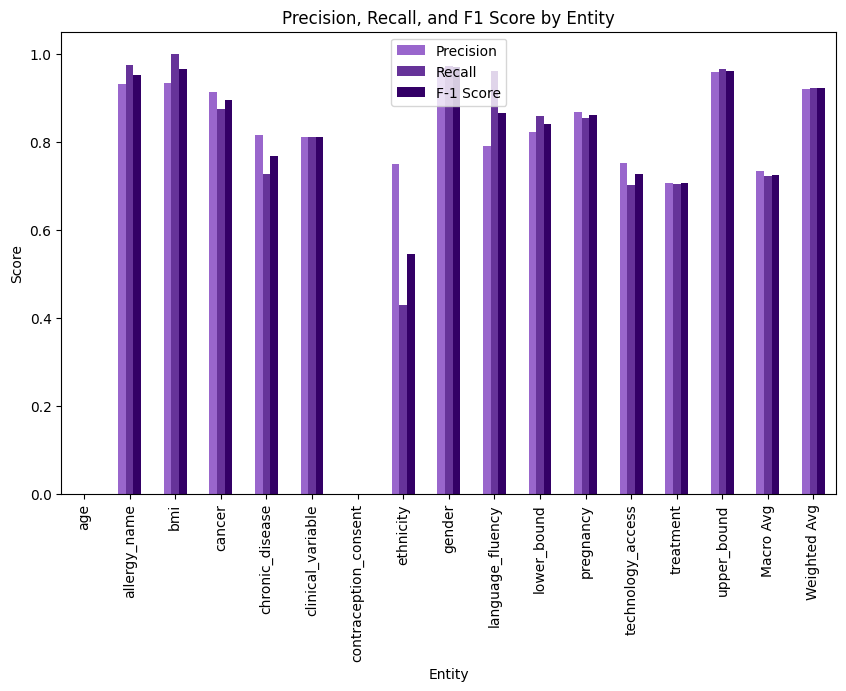

In [106]:

fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='bar', x='Entity', y=['Precision', 'Recall', 'F-1 Score'], ax=ax, colormap=purple_cmap, legend=True)
plt.title('Precision, Recall, and F1 Score by Entity')
plt.xlabel('Entity')
plt.ylabel('Score')
plt.show()

In [97]:
print("Accuracy: " + str(report_dict['accuracy']))

Accuracy: 0.9219297562495132
